# Power Outages
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the severity (number of customers, duration, or demand loss) of a major power outage.
    * Predict the cause of a major power outage.
    * Predict the number and/or severity of major power outages in the year 2020.
    * Predict the electricity consumption of an area.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings
### Introduction
For our project we wanted to continue our data analysis on the power outage data. By using other columns in the inital outage data, we wanted to use that data in order to answer our overarching question of: What is the cause of a major power outage?
For our project we chose to use the machine learning classification model titled SVM (Support Vector Machine). This classifier is most accurate for our project because this classification model separates groups within the dataset by finding a line that minimizes the misclassification error. Our target variable that we want to predict is the CAUSE.CATEGORY column. For our objective, we chose to use metrics.accuracy_score in order to measuer the accuracy of how close our predicted values are to the actual data.

### Baseline Model
We have a total number of 2 features for our baseline model.  The columns we chose to use are CLIMATE.REGION and CLIMATE.CATEGORY which are both classified as nominal data types.  Since these columns are of nominal type, we use OneHotEncoder to help evaluate our baseline model.  We chose these two specific columns because we believed that they were the most relevant to the outcome of our predictor variable CAUSE.CATEGORY.

For our baseline model, we intended to use OneHotEncoder to build a model in order to be able to predict the CAUSE.CATEGORY column and achieve high accuracy. For the columns CLIMATE.REGION and CLIMATE.CATEGORY, we chose to use OneHotEncoder on them. We chose these columns because these columns are of nominal type, and OneHotEncoder helps to categorize each unique value under each column. From there we created a Pipeline with the categorical model of SVM and was able to make predictions of what CAUSE.CATEGORY was going to look like. Our accuracy (score) for this baseline model came out to be 0.57 - 0.61.  We believe this score is not great.  It needs more engineered features to create a more accurate score.  Therefore we add more engineered features to our final model in addition to our baseline model to achieve a higher accuracy.

### Final Model
For our final model, since our baseline model was not accurate enough to our standards, we chose to transform and create new features using Standardization and Binarization. We standardized the OUTAGE.DURATION based on the MONTH column. The MONTH column helps to group each OUTAGE.DURATION based on its corresponding MONTH segment. Standardization helps to standardize all OUTAGE.DURATION values by incorporating the mean and standard deviation values.

The other new feature we constructed was to binarization CUSTOMERS.AFFECTED. This type of method helps to separate quantitative values based on a specific threshold. We use the CUSTOMERS.AFFECTED column in order to separate our groups between less than 10000 and greater than or equal to 10000. Our standardization and binarization methods count as new features methods.

We added all of our transformed columns of 'MONTH', 'CLIMATE.REGION', 'CLIMATE.CATEGORY', 'OUTAGE.DURATION','CUSTOMERS.AFFECTED', and 'CAUSE.CATEGORY.DETAIL' into a pipeline in order to make an effective prediction. We initally created three different piplines: OneHotEncoder, StdScalarByGroup, and Binarizer. From there we used the ColumnTransformer method in order to combine all of our pipelines together and apply them to the different columns. From there, we create our final pipeline model made from all of the other pipelines, and SVM (Support Vector Machine) in order to identify our predictions as a classifier. We choose to use C=10 as our parameter in the SVC classifier because it helps to create a more accurate outcome.  With that final pipeline, we were able to use our data and split them into test and training datasets. From there we fitted the model to our data and outputted the predictions of the causes of a major power outage using our pipline. Finally, we found our model to be effective and close to the actual data with a range of (R^2) score between 0.80 and 0.85.

### Fairness Evaluation
Under our fairness evaluation, we chose to use the parity measure of metrics.accuracy_score.  We choose this mode of measure in order to more easily get a list of accuracies between the Central and Northwest climate regions.  For this section, we use a permutation test to measure the accuracy of our final model chosen.  

First we get an observation value which incorporates subracting the accuracies between Central and Northwest.  Our simulation runs 1000 times in total to get a list of 1000 accuracy values.  We output a list in order to create a visual distribution with our p-value.  We will denote the significance level as 0.05.  The null hypothesis is that the accuracy for the Central region and Northwest region are on the same distribution.  The alternative hypothesis is that the accuracy for the Northwest region is higher than the accuracy for the Central region and they do not belong on the same distribution.  As a result, our p-value was much higher than 0.05, therefore we accept our null hypothesis.  Our resulting p-value lies within our distribution, so there is little to no randomness occurring.  

We can conclude that our model is fair due to the lack of randomness as well as the precision that is shown in our distribution.  There is no bias presented in our final model as shown by our permutation test.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.simplefilter('ignore')

### Baseline Model

Below we are reading and cleaning the inital given data "outage", making it easier to work with and visualize. After we clean the data, we create a smaller dataframe, "bs_outage" that we will use for our model later on in the project. We only get the applicable columns such as "MONTH", "CLIMATE.REGION", "CLIMATE.CATEGORY", "OUTAGE.DURATION", 
"CAUSE.CATEGORY",'CUSTOMERS.AFFECTED', and 'CAUSE.CATEGORY.DETAIL'. From there we clean the values by filling all the categorical NaN values to a new value of "unknown". We also filled all the numerical NaN values to 0 because it was best for our specific data. For example, for a month that has a NaN value, by replacing it with 0, we made a new month that contains all the power outages that have an unknown month value. We figured this was the best way to clean our data. After conducting all that cleaning, we now have out dataframe that we can work with and use in our Pipeline model. 

In [2]:
# original dataset
outage = pd.read_excel('outage.xlsx')
outage.columns = outage.iloc[4]
outage = outage.iloc[6:].reset_index().drop(["variables", "index", "OBS"], axis = 1)

# clean dataset
bs_outage = outage[["MONTH", "CLIMATE.REGION", "CLIMATE.CATEGORY", "OUTAGE.DURATION", "CAUSE.CATEGORY",'CUSTOMERS.AFFECTED', 'CAUSE.CATEGORY.DETAIL']]
bs_outage['MONTH'] = bs_outage['MONTH'].fillna(0)
bs_outage["OUTAGE.DURATION"] = bs_outage["OUTAGE.DURATION"].fillna(0)
bs_outage['CLIMATE.CATEGORY'] = bs_outage['CLIMATE.CATEGORY'].fillna("unknown")
bs_outage["CLIMATE.REGION"] = bs_outage["CLIMATE.REGION"].fillna("unknown")
bs_outage['CUSTOMERS.AFFECTED'] = bs_outage['CUSTOMERS.AFFECTED'].fillna(0)
bs_outage['CAUSE.CATEGORY.DETAIL'] = bs_outage['CAUSE.CATEGORY.DETAIL'].fillna("unknown")
bs_outage.head()

4,MONTH,CLIMATE.REGION,CLIMATE.CATEGORY,OUTAGE.DURATION,CAUSE.CATEGORY,CUSTOMERS.AFFECTED,CAUSE.CATEGORY.DETAIL
0,7,East North Central,normal,3060,severe weather,70000,unknown
1,5,East North Central,normal,1,intentional attack,0,vandalism
2,10,East North Central,cold,3000,severe weather,70000,heavy wind
3,6,East North Central,normal,2550,severe weather,68200,thunderstorm
4,7,East North Central,warm,1740,severe weather,250000,unknown


In our baseline model which consists of tranforming the columns "CLIMATE.REGION" and  "CLIMATE.CATEGORY" by One Hot Encoder, we build the baseline model. From simply just that transformation, we can see that our prediction accuracy is not very accurate. 

In [3]:
# baseline model, outcome score lower than final model score
def baseline_model(bs_outage):

    #categorical_columns 
    cat_cols = ["CLIMATE.REGION", "CLIMATE.CATEGORY"]

    #transformers
    cat_transformer = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore'))])
    
    #column transformer
    preproc = ColumnTransformer(transformers=[('cat', cat_transformer, cat_cols)]) 
    
    #pipeline to return 
    pl = Pipeline(steps=[('preprocessor', preproc), ("tree", SVC())])

    X = bs_outage.drop("CAUSE.CATEGORY", axis = 1)
    y = bs_outage["CAUSE.CATEGORY"]
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pl.fit(X_train, y_train)

    return pl.score(X_test, y_test)

baseline_model(bs_outage)

0.6041666666666666

### Final Model

For one of our new features, we chose to use Standard Scaler By Group.  We use this because we want to standardize the quantitative columns.  We later choose to standardize the OUTAGE.DURATION column which is grouped by the MONTH column.  This helps us scale all our durations in order to more easily assess our data in the final model.

In [4]:
class StdScalerByGroup(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # X may not be a pandas dataframe (e.g. a np.array)
        df = pd.DataFrame(X)
        
        # A table of means/standard-deviations for each column, for each group.
        #first dictionary is the means, second dictionary are the stds
        self.grps_ = [df.groupby(df.iloc[:, 0]).mean(),df.groupby(df.iloc[:, 0]).std()]

        return self

    def transform(self, X, y=None):

        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        

        # X may not be a dataframe (e.g. np.array)
        df = pd.DataFrame(X)
        stds = self.grps_[1]
        means = self.grps_[0]
  
        output = []
        for i in df.drop(df.columns[0], axis = 1):
            a = df.iloc[:,0]
            means_col = means[i][a]
            std_col = stds[i][a]
            output.append((df[i].values - means_col.values)/ std_col.values)
    
        for i in range(df.drop(df.columns[0], axis = 1).shape[1]):
            df.iloc[:, i+1] = output[i]
            
        return df.drop(df.columns[0], axis = 1).fillna(0)

For our Final Model, we use the following two new features: StdScalerByGroup and Binarizer.  The StdScalerByGroup is a new feature because we use a specific column to standardize each value within a column.  The binarizer changes values greater than or equal to 10000 to be 1 and everything below 10000 to be 0.  In addition to these two new engineered features, we also use OneHotEncoder here because we want to work with the nominal columns within the dataset.

In [5]:
def final_model(bs_outage):
    
    num_cols = ['CUSTOMERS.AFFECTED']
    
    #categorical_columns 
    cat_cols = ["CLIMATE.REGION", "CLIMATE.CATEGORY", 'CAUSE.CATEGORY.DETAIL']

    #transformers
    cat_transformer = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore'))])
    std_transformer = Pipeline([("stdscalar", StdScalerByGroup())])
    bin_transformer = Pipeline([("binarize", Binarizer(10000))])
    
    #column transformer
    preproc = ColumnTransformer(transformers=[("bin", bin_transformer, num_cols),('cat', cat_transformer, cat_cols), ('std', std_transformer, ['MONTH', 'OUTAGE.DURATION'])]) 
    
    #pipeline to return 
    pl = Pipeline(steps=[('preprocessor', preproc), ("tree", SVC(C=10))])

    X = bs_outage.drop("CAUSE.CATEGORY", axis = 1)
    y = bs_outage["CAUSE.CATEGORY"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pl.fit(X_train, y_train)

    return pl.score(X_test, y_test)

final_model(bs_outage)

0.8046875

### Fairness Evaluation

In [6]:
# model
num_cols = ['CUSTOMERS.AFFECTED']
    
#categorical_columns 
cat_cols = ["CLIMATE.REGION", "CLIMATE.CATEGORY", 'CAUSE.CATEGORY.DETAIL']

#transformers
cat_transformer = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore'))])
std_transformer = Pipeline([("stdscalar", StdScalerByGroup())])
bin_transformer = Pipeline([("binarize", Binarizer(10000))])

#column transformer
preproc = ColumnTransformer(transformers=[("bin", bin_transformer, num_cols),('cat', cat_transformer, cat_cols), ('std', std_transformer, ['MONTH', 'OUTAGE.DURATION'])]) 

bs_outage_copy = (bs_outage[(bs_outage["CLIMATE.REGION"] == "Central") | (bs_outage["CLIMATE.REGION"] == "Northwest")]).copy()
#pipeline to return 
pl = Pipeline(steps=[('preprocessor', preproc), ("tree", SVC(C=10))])

# observed value
# fitting the data 
X_train, X_test, y_train, y_test = train_test_split(bs_outage_copy.drop("CAUSE.CATEGORY", axis = 1), bs_outage_copy['CAUSE.CATEGORY'])
pl.fit(X_train, y_train)
lst = []
df = pd.DataFrame()
df['region'] = X_train['CLIMATE.REGION'].reset_index(drop = True)
df["pred"] = pl.predict(X_train)#.reset_index(drop = True)
df['actual'] = y_train.reset_index(drop = True)

obs= df.groupby('region').apply(lambda x: metrics.accuracy_score(x.actual, x.pred)).diff().iloc[-1]

# simulations 
for i in range(1000):

    #Central & Northwest Region
    #shuffle the column

    df['shuffled_region'] = df['region'].sample(frac = 1.0, replace = False).reset_index(drop = True)
    new_stat = df.groupby('shuffled_region').apply(lambda x: metrics.accuracy_score(x.actual, x.pred)).diff().iloc[-1]
    lst.append(new_stat)
        
lst = pd.Series(lst)
lst.head()

0    0.000532
1    0.033648
2   -0.016026
3    0.017090
4    0.066764
dtype: float64

As we see from the code presented here, we compare the observed value to its simulated distribution.  The red dot lies within the distribution, therefore we accept the null hypothesis.  Our p-value is far above the significance level of 0.05, so we see that the subgroups are within the distributions.  There is no difference in accuracies between Central and Northwest.  This shows that there is no randomness present and our final model is concluded as fair.

0.608


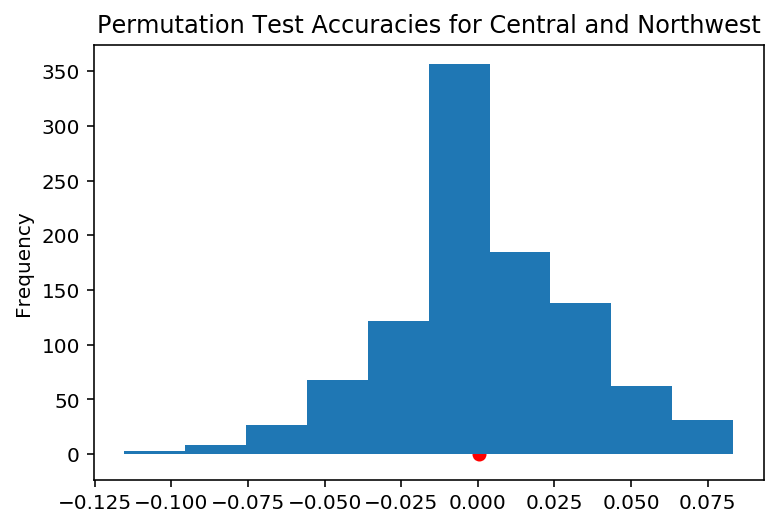

In [7]:
# GET DISTRIBUTION
print(pd.Series(lst >= obs).mean())
pd.Series(lst.plot(kind='hist', title='Permutation Test Accuracies for Central and Northwest'))
plt.scatter(obs, 0, c='r');